In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 1. 법정동 코드 가공

In [3]:
#
locCode = pd.read_excel('../data/법정동코드.xlsx')
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [4]:
#읍면동이 NaN인 데이터 추출 > 읍면동 제외
locCode=locCode.dropna(subset=['시군구명'])
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN


In [5]:
# 시군구가 NaN이 아닌 데이터 추출 > 시도명 제외
locCode=locCode.dropna(subset=['시군구명'])
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN


In [6]:
# 법정동 코드 컬럼에서 5자리 추출합니다.
# 예) 서울특별시 종로구 > 11000
locCode['법정동코드']=locCode['법정동코드'].astype(str)
locCode['지역코드']=locCode['법정동코드'].str.slice(start=0, stop=5)
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN,11110
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN,11110
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN,11110
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN,11110
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN,11110


In [7]:
# 시도명이 서울특별시인 데이터만 추출 후 시도명, 시군구명, 지역코드 컬럼만 추출 
loc1 = locCode[locCode['시도명']=="서울특별시"]
loc1

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN,11110
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN,11110
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN,11110
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN,11110
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN,11110
...,...,...,...,...,...,...,...,...
488,1174010600,서울특별시,강동구,둔촌동,NaN,19880423,NaN,11740
489,1174010700,서울특별시,강동구,암사동,NaN,19880423,NaN,11740
490,1174010800,서울특별시,강동구,성내동,NaN,19880423,NaN,11740
491,1174010900,서울특별시,강동구,천호동,NaN,19880423,NaN,11740


# 2. 실거래가 데이터 가공

In [8]:
# 실거래가 데이터 불러오기
apt = pd.read_csv('../data/2020년 서울 아파트 실거래가.csv', encoding="cp949")
apt.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티
1,길음동,84.77,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아
2,구로동,36.90,1.0,2001,아파트,105000000,1994.0,궁전아트빌라
3,산천동,59.55,2.0,2001,아파트,830000000,2001.0,리버힐삼성
4,이촌동,64.43,5.0,2001,아파트,735000000,1971.0,강변


In [9]:
# 데이터 프레임의 컬럼을 확인합니다.
apt.columns

Index(['법정동명', '건물면적', '층정보', '건물주용도코드', '건물주용도', '거래금액', '건축년도', '아파트명'], dtype='object')

In [10]:
# 데이터 프레임의 크기(차원)을 조회합니다
apt.shape

(176001, 8)

In [11]:
# 불러온 데이터에 NA값이 있는지 조회합니다.
apt.isnull().sum()

법정동명           0
건물면적           0
층정보        12163
건물주용도코드        0
건물주용도          0
거래금액           0
건축년도         565
아파트명       12163
dtype: int64

In [12]:
# 실거래가 데이터프레임 정보 조회
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176001 entries, 0 to 176000
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   법정동명     176001 non-null  object 
 1   건물면적     176001 non-null  float64
 2   층정보      163838 non-null  float64
 3   건물주용도코드  176001 non-null  int64  
 4   건물주용도    176001 non-null  object 
 5   거래금액     176001 non-null  int64  
 6   건축년도     175436 non-null  float64
 7   아파트명     163838 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 10.7+ MB


In [13]:
# 실거래가 데이터프레임 정보 조회 (거래금액 컬럼 변경 확인)

apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176001 entries, 0 to 176000
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   법정동명     176001 non-null  object 
 1   건물면적     176001 non-null  float64
 2   층정보      163838 non-null  float64
 3   건물주용도코드  176001 non-null  int64  
 4   건물주용도    176001 non-null  object 
 5   거래금액     176001 non-null  int64  
 6   건축년도     175436 non-null  float64
 7   아파트명     163838 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 10.7+ MB


In [14]:
# 범주화된 전용면적의 고유값을 확인합니다.
apt['건물면적'].unique()

array([ 59.92,  84.77,  36.9 , ..., 536.52, 292.27, 294.03])

# 3. 데이터 프레임 결합

In [15]:
# 지역 코드를 기준으로 법정동 코드 데이터 프레임과 아파트 실거래가 데이터 프레임을 결합합니다.
loc1
apt
df = pd.merge(apt,loc1,left_on=['법정동명'],right_on=['읍면동명'])
df

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티,1129013800,서울특별시,성북구,장위동,NaN,19880423,NaN,11290
1,장위동,116.91,2.0,2001,아파트,1270000000,0.0,래미안장위퍼스트하이,1129013800,서울특별시,성북구,장위동,NaN,19880423,NaN,11290
2,장위동,59.99,17.0,2001,아파트,820000000,0.0,래미안장위퍼스트하이,1129013800,서울특별시,성북구,장위동,NaN,19880423,NaN,11290
3,장위동,62.55,NaN,1001,단독주택,714600000,1970.0,NaN,1129013800,서울특별시,성북구,장위동,NaN,19880423,NaN,11290
4,장위동,84.48,12.0,2001,아파트,1150000000,0.0,꿈의숲 아이파크,1129013800,서울특별시,성북구,장위동,NaN,19880423,NaN,11290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179813,구수동,29.98,5.0,2002,연립주택,295000000,2015.0,동원스위트홈,1144011300,서울특별시,마포구,구수동,NaN,19880423,NaN,11440
179814,구수동,64.20,3.0,2002,연립주택,508000000,2009.0,근상프리즘1동,1144011300,서울특별시,마포구,구수동,NaN,19880423,NaN,11440
179815,구수동,29.95,2.0,2002,연립주택,380000000,2015.0,동원스위트홈,1144011300,서울특별시,마포구,구수동,NaN,19880423,NaN,11440
179816,구수동,41.21,3.0,2002,연립주택,390000000,2015.0,동원스위트홈(16-5),1144011300,서울특별시,마포구,구수동,NaN,19880423,NaN,11440


In [16]:
pd.options.display.float_format = '{:.0f}'.format
df['평']=round(df['건물면적']*0.3025)
df['평당가격']=df['거래금액']/df['평']
df

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드,평,평당가격
0,장위동,60,5,2001,아파트,749000000,0,래미안 장위포레카운티,1129013800,서울특별시,성북구,장위동,NaN,19880423,nan,11290,18,41611111
1,장위동,117,2,2001,아파트,1270000000,0,래미안장위퍼스트하이,1129013800,서울특별시,성북구,장위동,NaN,19880423,nan,11290,35,36285714
2,장위동,60,17,2001,아파트,820000000,0,래미안장위퍼스트하이,1129013800,서울특별시,성북구,장위동,NaN,19880423,nan,11290,18,45555556
3,장위동,63,nan,1001,단독주택,714600000,1970,NaN,1129013800,서울특별시,성북구,장위동,NaN,19880423,nan,11290,19,37610526
4,장위동,84,12,2001,아파트,1150000000,0,꿈의숲 아이파크,1129013800,서울특별시,성북구,장위동,NaN,19880423,nan,11290,26,44230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179813,구수동,30,5,2002,연립주택,295000000,2015,동원스위트홈,1144011300,서울특별시,마포구,구수동,NaN,19880423,nan,11440,9,32777778
179814,구수동,64,3,2002,연립주택,508000000,2009,근상프리즘1동,1144011300,서울특별시,마포구,구수동,NaN,19880423,nan,11440,19,26736842
179815,구수동,30,2,2002,연립주택,380000000,2015,동원스위트홈,1144011300,서울특별시,마포구,구수동,NaN,19880423,nan,11440,9,42222222
179816,구수동,41,3,2002,연립주택,390000000,2015,동원스위트홈(16-5),1144011300,서울특별시,마포구,구수동,NaN,19880423,nan,11440,12,32500000


In [17]:
df1=df[['건물면적','층정보','건물주용도','거래금액','건축년도','아파트명','지역코드','시군구명','읍면동명','평','평당가격']]
df1      

,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명,지역코드,시군구명,읍면동명,평,평당가격
0,60,5,아파트,749000000,0,래미안 장위포레카운티,11290,성북구,장위동,18,41611111
1,117,2,아파트,1270000000,0,래미안장위퍼스트하이,11290,성북구,장위동,35,36285714
2,60,17,아파트,820000000,0,래미안장위퍼스트하이,11290,성북구,장위동,18,45555556
3,63,nan,단독주택,714600000,1970,NaN,11290,성북구,장위동,19,37610526
4,84,12,아파트,1150000000,0,꿈의숲 아이파크,11290,성북구,장위동,26,44230769
...,...,...,...,...,...,...,...,...,...,...,...
179813,30,5,연립주택,295000000,2015,동원스위트홈,11440,마포구,구수동,9,32777778
179814,64,3,연립주택,508000000,2009,근상프리즘1동,11440,마포구,구수동,19,26736842
179815,30,2,연립주택,380000000,2015,동원스위트홈,11440,마포구,구수동,9,42222222
179816,41,3,연립주택,390000000,2015,동원스위트홈(16-5),11440,마포구,구수동,12,32500000


In [18]:
df1.loc[(df1['건축년도'] == 0),'건축년도']=2000
df1

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명,지역코드,시군구명,읍면동명,평,평당가격
0,60,5,아파트,749000000,2000,래미안 장위포레카운티,11290,성북구,장위동,18,41611111
1,117,2,아파트,1270000000,2000,래미안장위퍼스트하이,11290,성북구,장위동,35,36285714
2,60,17,아파트,820000000,2000,래미안장위퍼스트하이,11290,성북구,장위동,18,45555556
3,63,nan,단독주택,714600000,1970,NaN,11290,성북구,장위동,19,37610526
4,84,12,아파트,1150000000,2000,꿈의숲 아이파크,11290,성북구,장위동,26,44230769
...,...,...,...,...,...,...,...,...,...,...,...
179813,30,5,연립주택,295000000,2015,동원스위트홈,11440,마포구,구수동,9,32777778
179814,64,3,연립주택,508000000,2009,근상프리즘1동,11440,마포구,구수동,19,26736842
179815,30,2,연립주택,380000000,2015,동원스위트홈,11440,마포구,구수동,9,42222222
179816,41,3,연립주택,390000000,2015,동원스위트홈(16-5),11440,마포구,구수동,12,32500000


In [19]:
df1= df1[df1['건물주용도']=='아파트']
df1['건축년도'].astype(int)
df1

,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명,지역코드,시군구명,읍면동명,평,평당가격
0,60,5,아파트,749000000,2000,래미안 장위포레카운티,11290,성북구,장위동,18,41611111
1,117,2,아파트,1270000000,2000,래미안장위퍼스트하이,11290,성북구,장위동,35,36285714
2,60,17,아파트,820000000,2000,래미안장위퍼스트하이,11290,성북구,장위동,18,45555556
4,84,12,아파트,1150000000,2000,꿈의숲 아이파크,11290,성북구,장위동,26,44230769
5,84,18,아파트,1300000000,2000,꿈의숲 아이파크,11290,성북구,장위동,26,50000000
...,...,...,...,...,...,...,...,...,...,...,...
179762,85,7,아파트,1680000000,2016,래미안 웰스트림,11440,마포구,현석동,26,64615385
179763,85,30,아파트,1845000000,2016,래미안 웰스트림,11440,마포구,현석동,26,70961538
179764,85,17,아파트,1845000000,2016,래미안 웰스트림,11440,마포구,현석동,26,70961538
179766,59,3,아파트,930000000,1999,밤섬힐스테이트,11440,마포구,현석동,18,51666667


In [20]:
df1.corr()

,건물면적,층정보,거래금액,건축년도,평,평당가격
건물면적,1,0,1,0,1,-0
층정보,0,1,0,0,0,0
거래금액,1,0,1,0,1,1
건축년도,0,0,0,1,0,0
평,1,0,1,0,1,-0
평당가격,-0,0,1,0,-0,1


      층정보  평  평당가격  거래금액  건축년도
층정보     1  0     0     0     0
평       0  1    -0     1     0
평당가격    0 -0     1     1     0
거래금액    0  1     1     1     0
건축년도    0  0     0     0     1


<AxesSubplot:>

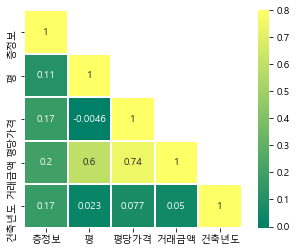

In [21]:
corr1 = df1[['층정보','평','평당가격','거래금액','건축년도','지역코드']]
corr1 = corr1.corr()
print(corr1)

mask = np.array(corr1)
mask[np.tril_indices_from(mask)] = False 
sns.heatmap(corr1,
            mask=mask,
            vmax=0.8,
            square=True,
            annot=True,
           linewidths=0.8,
            cmap='summer'
           )


## 지역별 평당가격

In [22]:
df1.pivot_table(index=['시군구명'],values=['평당가격']).sort_values(by='평당가격',ascending=False)

,평당가격
시군구명,
강남구,63532698
서초구,61941368
송파구,52180706
용산구,51885024
성동구,47250301
마포구,42773590
광진구,41748508
동작구,39711207
영등포구,38819486


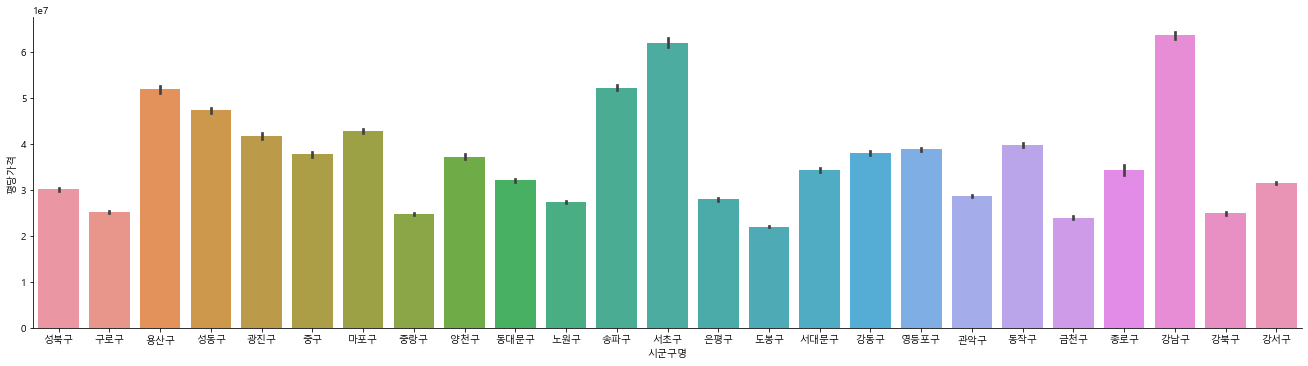

In [23]:
#지역별 평당가격

g1 = sns.catplot(x='시군구명', y="평당가격", data=df1, kind='bar')

g1.fig.set_figwidth(20)
g1.fig.set_figheight(5)

## 1층은 과연 소문대로 저렴할까?
    일반적으로 저층, 특히 1층의 경우 사람들이 선호하지 않기때문에 저렴하다고 생각한다.
    과연 소문대로 1층은 저렴할까?

In [24]:
df1.sort_values(by='층정보',ascending=True)

,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명,지역코드,시군구명,읍면동명,평,평당가격
91735,85,-3,아파트,1700000000,2019,아크로리버하임,11590,동작구,흑석동,26,65384615
150114,135,-3,아파트,1040000000,2010,은평뉴타운 우물골(두산위브7단지),11380,은평구,진관동,41,25365854
149781,135,-3,아파트,820000000,2010,은평뉴타운 우물골(두산위브7단지),11380,은평구,진관동,41,20000000
6963,108,-2,아파트,2200000000,2016,옥수파크힐스101동~116동,11200,성동구,옥수동,33,66666667
2126,60,-2,아파트,745000000,2019,롯데캐슬골든힐스,11290,성북구,길음동,18,41388889
...,...,...,...,...,...,...,...,...,...,...,...
130274,137,61,아파트,2690000000,2002,타워팰리스1,11680,강남구,도곡동,42,64047619
130946,186,63,아파트,3500000000,2004,타워팰리스3,11680,강남구,도곡동,56,62500000
68554,154,66,아파트,2400000000,2003,현대하이페리온,11470,양천구,목동,47,51063830
130824,186,66,아파트,3800000000,2004,타워팰리스3,11680,강남구,도곡동,56,67857143


- 아파트의 층은 최저 B3층부터 최고 67층까지 있다.
- 아파트마다 바닥이 닿는 의미인 1층의 기준이 각각 다르지만, 아파트의 기준을 전부 조회하기에는 너무 많은 시간과 데이터를 필요로한다.
- 이에 모든 아파트의 1층을 기준으로 분석해보려한다.

In [25]:
# 1층으로 묶기

floor = df1['층정보'] == 1
floor1 = df1[floor]
floor1.sort_values(by='평당가격',ascending=False)

,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명,지역코드,시군구명,읍면동명,평,평당가격
131139,50,1,아파트,2640000000,1982,개포주공 1단지,11680,강남구,개포동,15,176000000
131062,36,1,아파트,1630000000,1982,개포주공 1단지,11680,강남구,개포동,11,148181818
131176,42,1,아파트,1800000000,1982,개포주공 1단지,11680,강남구,개포동,13,138461538
131097,58,1,아파트,2420000000,1982,개포주공 1단지,11680,강남구,개포동,18,134444444
131115,57,1,아파트,2150000000,1982,개포주공 1단지,11680,강남구,개포동,17,126470588
...,...,...,...,...,...,...,...,...,...,...,...
5198,41,1,아파트,90000000,1997,(793-46),11530,구로구,구로동,13,6923077
51935,29,1,아파트,62000000,2002,건양,11530,구로구,개봉동,9,6888889
5230,46,1,아파트,95000000,1996,대영빌라,11530,구로구,구로동,14,6785714
3871,48,1,아파트,95000000,1996,정창빌라,11530,구로구,구로동,15,6333333


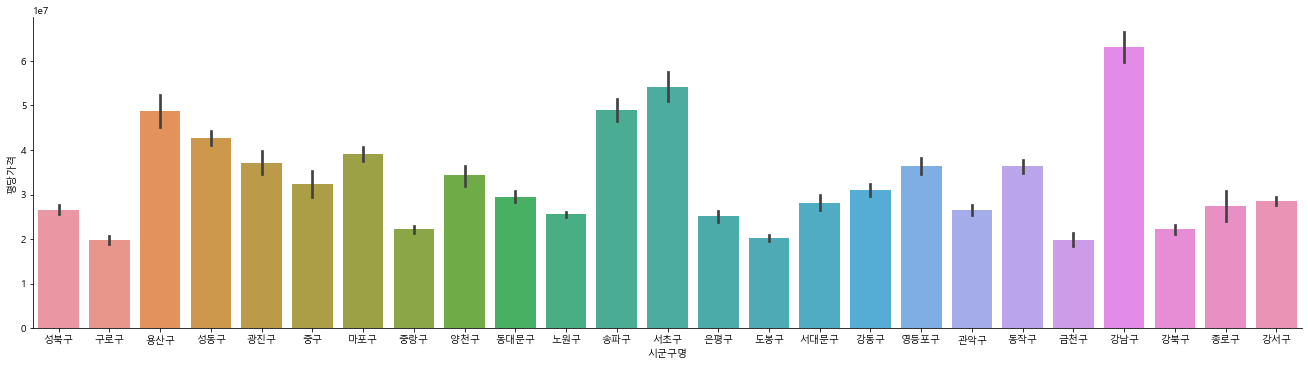

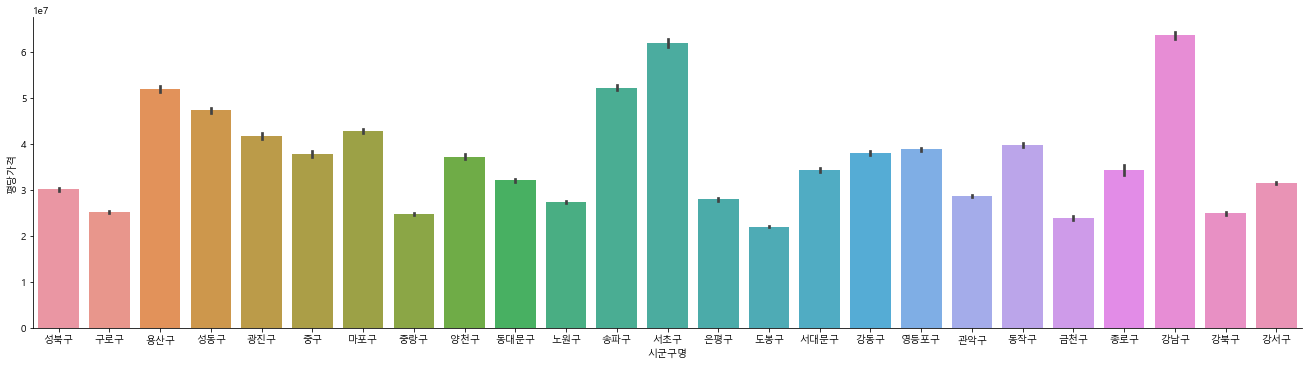

In [71]:
#지역별 1층 평당가격
g1 = sns.catplot(x='시군구명', y="평당가격", data=floor1, kind='bar')
g1.fig.set_figwidth(20)
g1.fig.set_figheight(5)

#지역별 평당가격
g2 = sns.catplot(x='시군구명', y="평당가격", data=df1, kind='bar')
g2.fig.set_figwidth(20)
g2.fig.set_figheight(5)

 -   지역별 평당가격과 지역별 1층 평당가격을 비교했을때 비교적 수치가 낮은 것을 확인할 수 있다.
 -   강남구의 경우 1층이지만 다른 층보다 가격이 높은 경우가 있었다.
 -   이에 어떤 요소가 강남구 아파트 1층의 가격을 높게 했는지 알아보고자 한다.

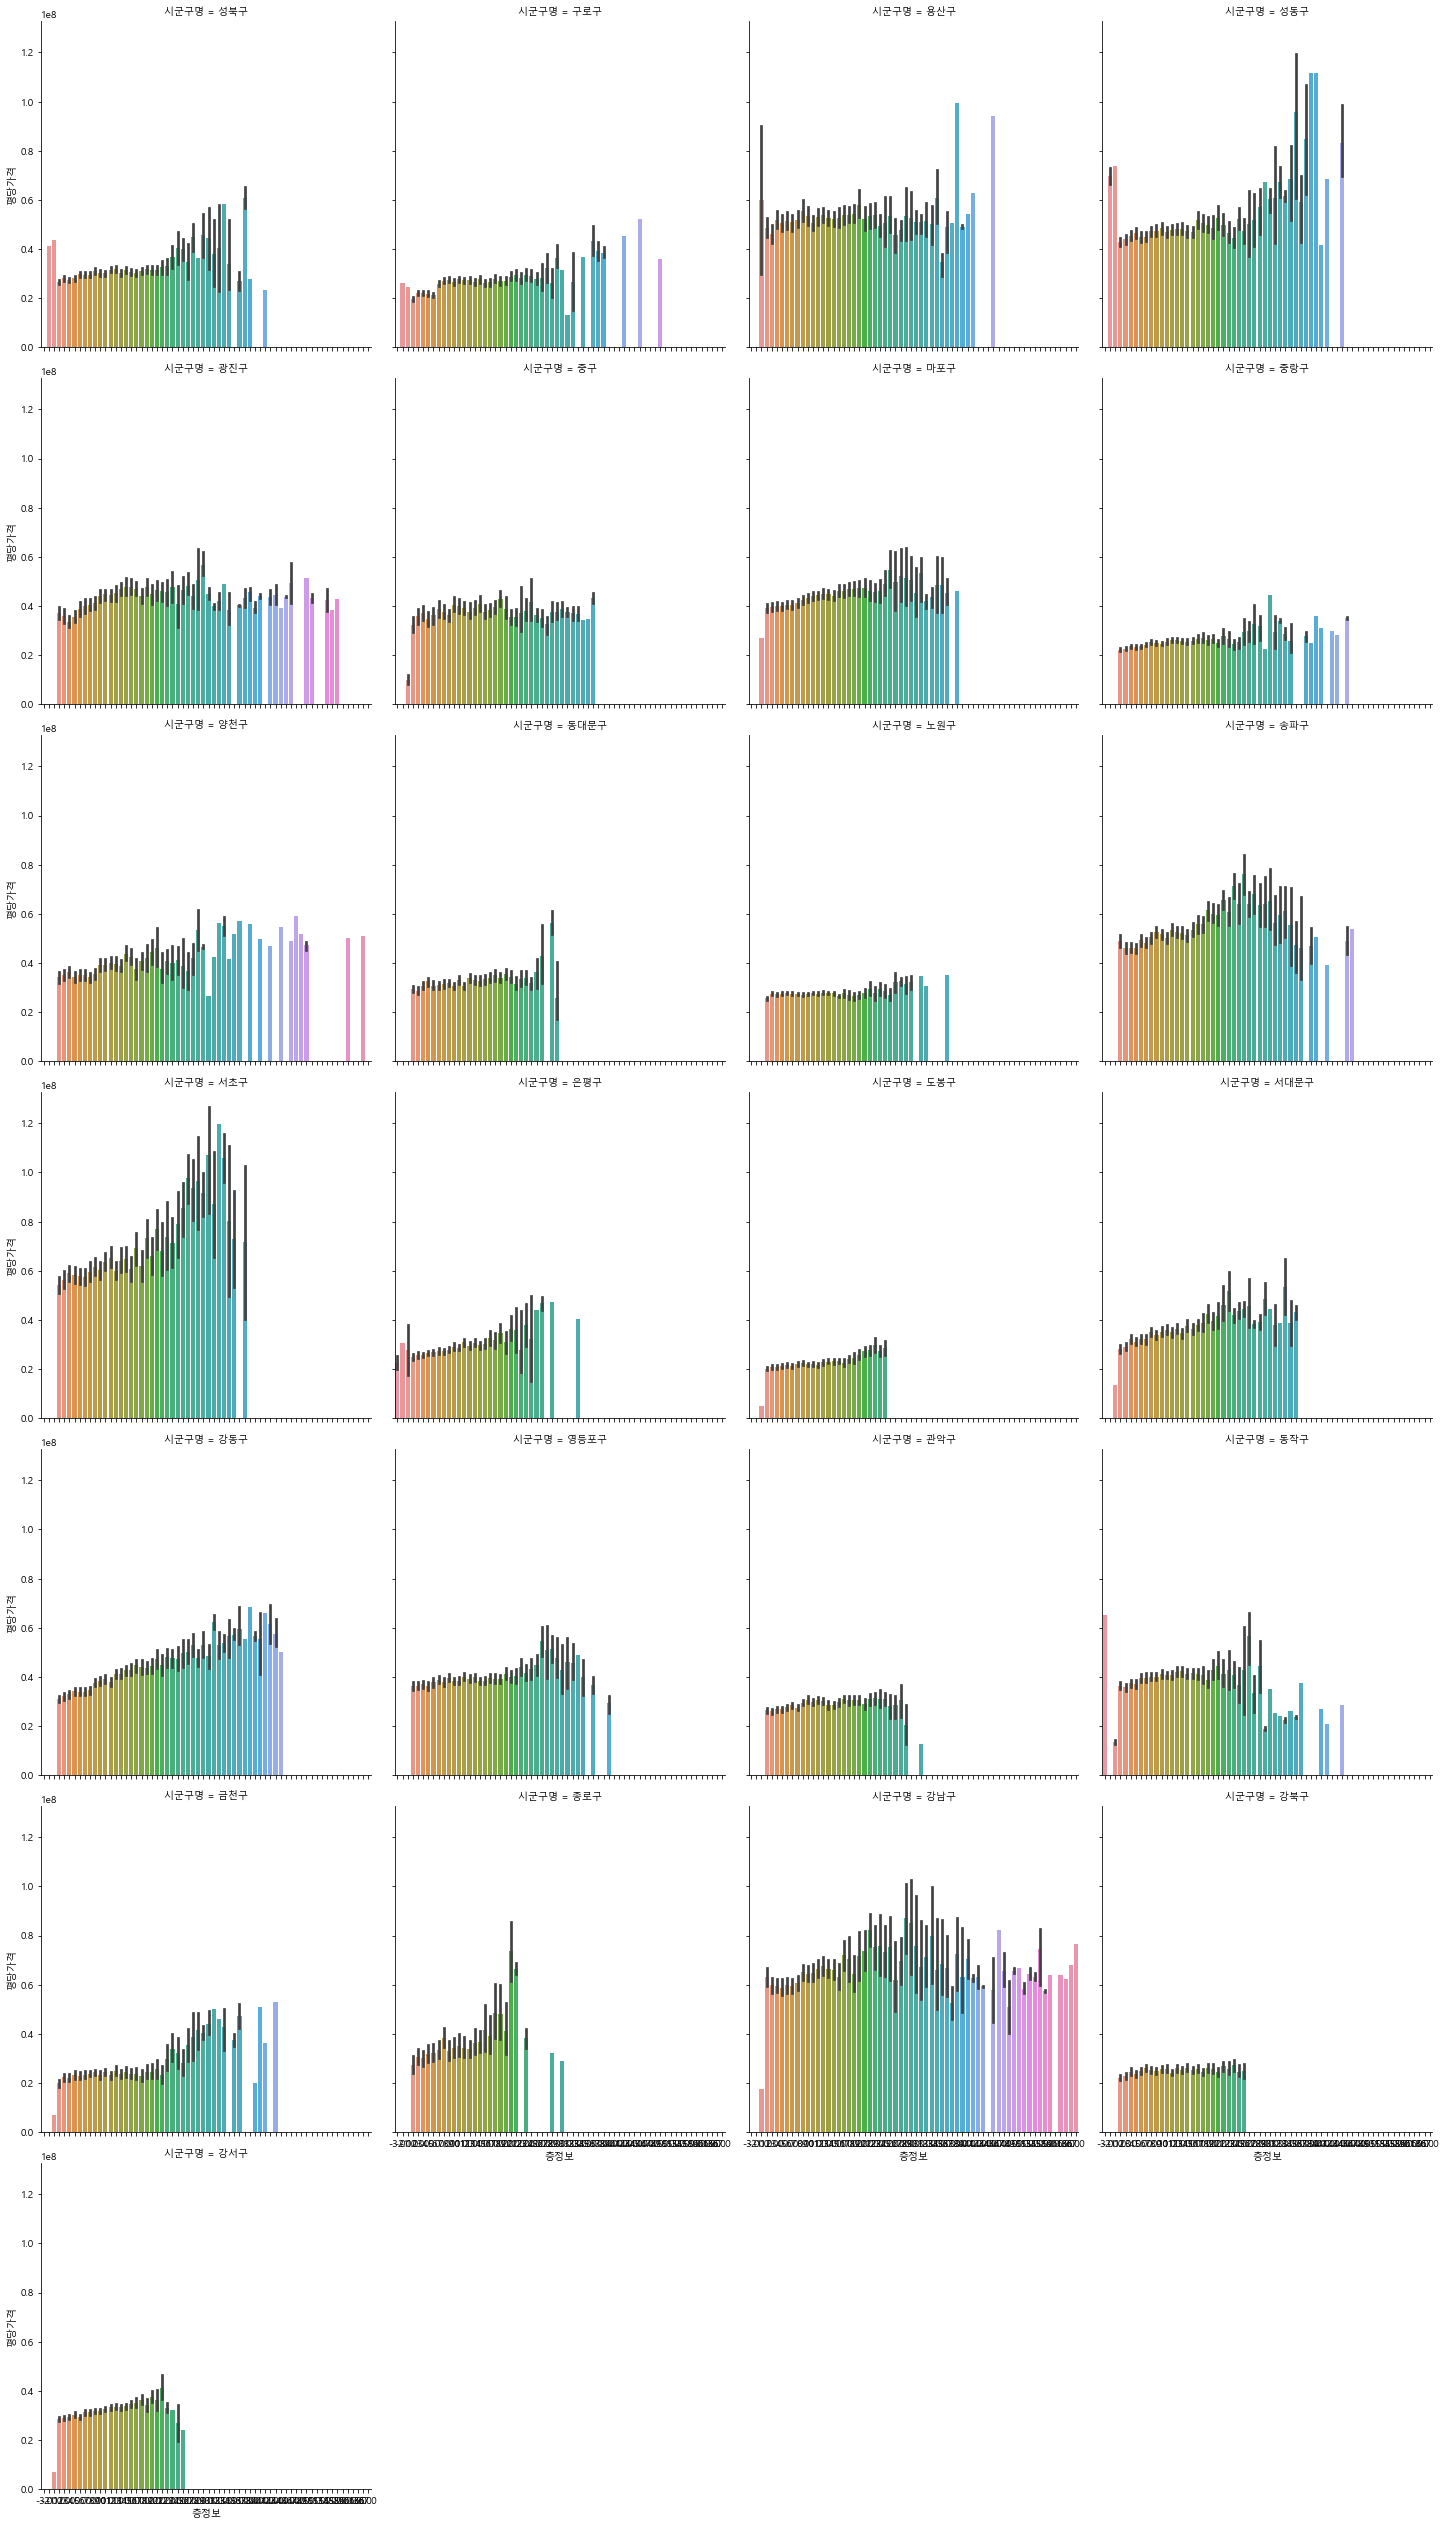

In [29]:
#지역별 층별 평당가격 (세분화)

a1 = sns.catplot(kind="bar", data=df1, x = "층정보", y="평당가격", col="시군구명", col_wrap=4)
a1

In [30]:
# 강남구 아파트 평균값 조회
df1.groupby('시군구명')['평당가격'].mean()

시군구명
강남구    63532698
강동구    38041342
강북구    24945671
강서구    31534820
관악구    28652480
광진구    41748508
구로구    25158397
금천구    23947064
노원구    27369097
도봉구    22052793
동대문구   32057537
동작구    39711207
마포구    42773590
서대문구   34259210
서초구    61941368
성동구    47250301
성북구    30126164
송파구    52180706
양천구    37238629
영등포구   38819486
용산구    51885024
은평구    28002040
종로구    34254226
중구     37739374
중랑구    24770944
Name: 평당가격, dtype: float64

In [31]:
#평균값보다 높은 강남구의 1층 아파트 조회
pd.set_option('display.max_rows', None)
local = floor1['시군구명'] == '강남구'
cost = floor1['평당가격'] >= 63532698
Gangnam = floor1[local & cost]
Gangnam.sort_values(by='평당가격',ascending=False)

,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명,지역코드,시군구명,읍면동명,평,평당가격
131139,50,1,아파트,2640000000,1982,개포주공 1단지,11680,강남구,개포동,15,176000000
131062,36,1,아파트,1630000000,1982,개포주공 1단지,11680,강남구,개포동,11,148181818
131176,42,1,아파트,1800000000,1982,개포주공 1단지,11680,강남구,개포동,13,138461538
131097,58,1,아파트,2420000000,1982,개포주공 1단지,11680,강남구,개포동,18,134444444
131115,57,1,아파트,2150000000,1982,개포주공 1단지,11680,강남구,개포동,17,126470588
131079,58,1,아파트,2260000000,1982,개포주공 1단지,11680,강남구,개포동,18,125555556
111890,50,1,아파트,1790000000,1977,한양1차(영동한양),11680,강남구,압구정동,15,119333333
111731,50,1,아파트,1705000000,1977,한양1차(영동한양),11680,강남구,압구정동,15,113666667
131571,54,1,아파트,1800000000,1983,개포주공 5단지,11680,강남구,개포동,16,112500000
130913,53,1,아파트,1790000000,1985,한신(개포),11680,강남구,도곡동,16,111875000


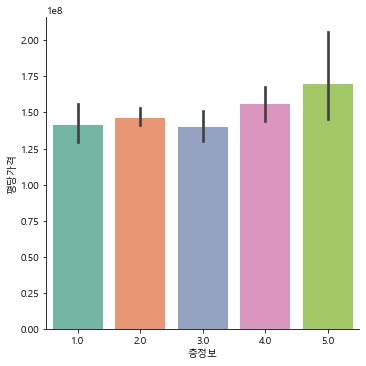

In [77]:
#개포주공 1단지
Gang = df1['아파트명'] == '개포주공 1단지'
Gang1 = df1[Gang]
sns.set_palette("Set2")
Gang1.sort_values(by='평당가격',ascending=False)
g1 = sns.catplot(x='층정보', y="평당가격", data=Gang1, kind='bar')

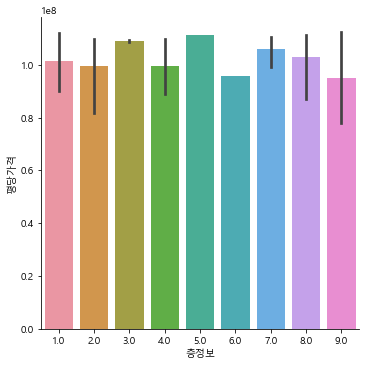

In [79]:
#한신(개포)
sns.color_palette("Set2")
Gang = df1['아파트명'] == '한신(개포)'
Gang1 = df1[Gang]
sns.set_palette("Set2")
Gang1.sort_values(by='평당가격',ascending=False)
g1 = sns.catplot(x='층정보', y="평당가격", data=Gang1, kind='bar')

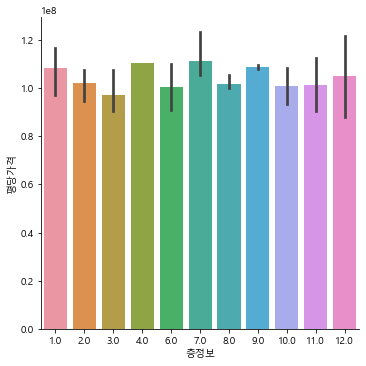

In [80]:
#한양1차(영동한양)
sns.color_palette("Set2")
Gang = df1['아파트명'] == '한양1차(영동한양)'
Gang1 = df1[Gang]
sns.set_palette("Set2")
Gang1.sort_values(by='평당가격',ascending=False)
g1 = sns.catplot(x='층정보', y="평당가격", data=Gang1, kind='bar')

### 중간 결론
    - 특정 아파트 평균가격이 강남 아파트의 평균가격보다 비싸기 때문에 저층인 1층임에도 비교적 높게 잡혔다. 
    - 모든 1층 아파트의 가격이 낮은것은 아니나, 리모델링 등 예외적 이유가 있을 수 있다 추정된다.

### 분위별 층별 평당가격정보
    추가적으로 층별 평당가격 정보를 알아보기 위해 분위별을 기준으로 분석해보기로 하였다.
    공시지가가 비슷한 지역을 기준으로 분위를 나누었다.

In [34]:
area_c = pd.DataFrame({'시군구명':['강남구','서초구','송파구','용산구','성동구','마포구','광진구','동작구','영등포구','강동구','중구','양천구','서대문구','종로구','동대문구','강서구','성북구','관악구','은평구','노원구','구로구','강북구','중랑구','금천구','도봉구'],
                      '분위':[1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,4]})
area_c
df3=df1
df4=pd.merge(df3, area_c)

In [35]:
# df1.groupby('시군구명')[['평당가격']].mean().sort_values(by="평당가격", ascending=False)
df4.pivot_table(index=['분위','층정보'], values=['평당가격'])


평당가격
분위 층정보         
1  -2  69746377
   -1  55966343
   1   52255619
   2   51393255
   3   53147608
   4   52594131
   5   53682839
   6   53010009
   7   54469741
   8   56998160
   9   56161368
   10  55689344
   11  57713857
   12  57068532
   13  57114353
   14  56406635
   15  54745774
   16  59569096
   17  57340634
   18  60076081
   19  60300181
   20  63103772
   21  64141515
   22  62105130
   23  65089524
   24  65288705
   25  71438201
   26  67722255
   27  68224258
   28  70481380
   29  71165511
   30  69226746
   31  64039748
   32  66805095
   33  69753298
   34  65211940
   35  63428918
   36  57448889
   37  70814632
   38  75043174
   39  62366566
   40  59197674
   41  59876604
   42  63112822
   43  59300000
   44  83344420
   45  61669833
   46  68068362
   47  65581025
   48  51120270
   49  65765766
   50  66904762
   51  58124006
   53  64465409
   54  63154955
   55  74695274
   58  57504975
   59  64000000
   61  64047619
   63  62500000
   66  67857143
   67  76408451
2  -3  65384615
   -1  13455544
   1   35430862
   2   35839641
   3   36513053
   4   36229774
   5   37221447
   6   37413053
   7   37607633
   8   39132870
   9   40206583
   10  40735625
   11  40967599
   12  41740587
   13  41701150
   14  42182282
   15  42317805
   16  42226343
   17  42505050
   18  42855421
   19  43702142
   20  44243018
   21  42816136
   22  44825977
   23  43984561
   24  44375145
   25  46066266
   26  48210003
   27  48040875
   28  47737716
   29  47418452
   30  43539775
   31  51037318
   32  43264099
   33  43951272
   34  46753159
   35  44686941
   36  46193481
   37  47413119
   38  51234804
   39  39993145
   40  46813334
   41  43455556
   42  50057757
   43  52444567
   44  43060007
   45  43860544
   46  49208882
   47  59183673
   48  51851852
   49  48346873
   50  43214286
   54  42443747
   55  38461538
   58  42820513
   60  50000000
   66  51063830
3  -2  41388889
   -1  21385217
   1   27842579
   2   28386193
   3   29301229
   4   29933622
   5   29992570
   6   30671093
   7   31447292
   8   31767306
   9   31732412
   10  32337948
   11  32508468
   12  33279598
   13  32535927
   14  33023064
   15  33106189
   16  33222282
   17  33989127
   18  34456491
   19  34158432
   20  33442251
   21  33455387
   22  33997618
   23  35423470
   24  33879002
   25  36259746
   26  39664804
   27  40110069
   28  37650418
   29  39405974
   30  40579186
   31  34741732
   32  39981481
   33  55085470
   34  35865526
   35  43076923
   36  27137500
   37  60908120
   38  28000000
   41  23269231
4  -3  22682927
   -2  28293424
   -1  18423517
   1   22767534
   2   24295905
   3   24498816
   4   24528007
   5   24754833
   6   25601654
   7   25937965
   8   25947081
   9   25855682
   10  26359379
   11  26285901
   12  26736211
   13  26638785
   14  26768404
   15  25951090
   16  26288499
   17  26593839
   18  26831218
   19  26804815
   20  27733584
   21  28725936
   22  27984095
   23  28865963
   24  28276009
   25  27708785
   26  32012240
   27  33269481
   28  33570701
   29  35544970
   30  41679321
   31  30630006
   32  30972468
   33  37821675
   34  28422549
   35  37698511
   36  43330598
   37  33383704
   38  35128205
   39  27885621
   40  41125000
   41  36111111
   42  37609375
   43  40501048
   45  40837348
   49  35819398

- 분위별로 그룹을 나눠서 층별 평당가격을 조회하려한다.

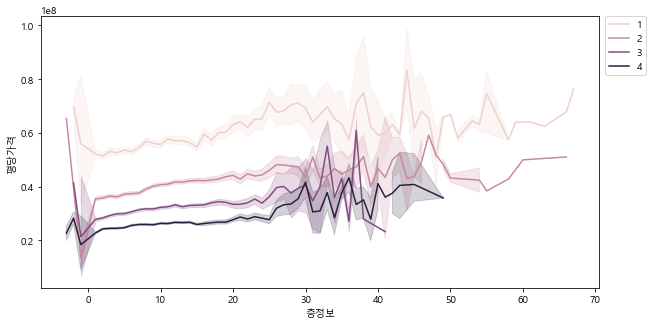

In [36]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df4, x="층정보", y="평당가격", hue="분위")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)


- 사람들이 주로 선호하는 로얄층일때 평당 가격이 높고 저층일때 평당가격이 감소하는 것을 알 수 있다.
- 분위별로 나눠봤을 때 층에 따른 평당 가격의 추이가 비슷한 것으로 보아, 층과 평당가격에 연관이 있음을 알 수 있다.

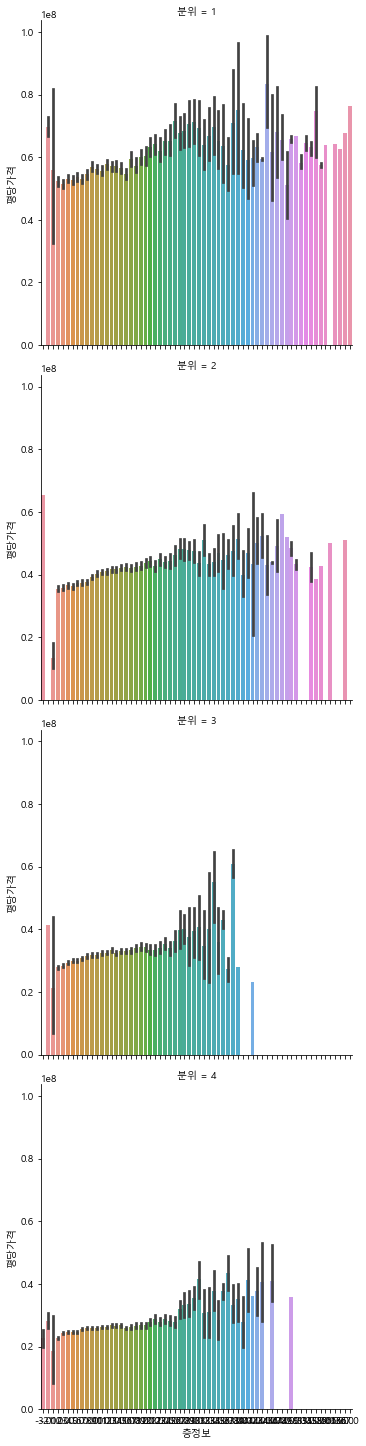

In [37]:
#분위별 아파트 평당가격

sns.catplot(kind="bar", data=df4, x = "층정보", y="평당가격", col="분위", col_wrap=1)

### 분석결과
    - 1층은 다른 층에 비해 비교적 평당 가격이 낮았고 최고층보다는 로얄층으로 불리는 2/3 고층의 가격이 높았다.
    - 모든 1층 아파트의 가격이 낮은것은 아니나, 리모델링 등 예외적 이유가 있을 수 있다 추정된다.
    - 층별로 아파트의 가격이 상이함을 알 수 있었다.
    - 분위별로 나눠봤을 때 층에 따른 평당 가격의 추이가 비슷한 것으로 보아, 층과 평당가격에 연관이 있음을 알 수 있다.